In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from Functions import StatisticalAnalysis

from scipy import stats
from sklearn.decomposition import PCA, FastICA

EstPDF: Histogram Mode
Ja deu!
Chi-Squared 43.1327265423


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hist (Potential memory leak).


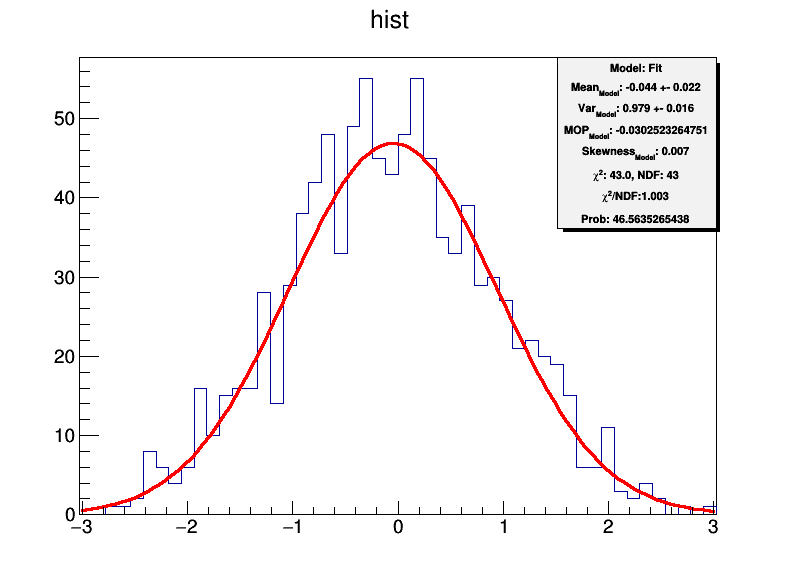

In [135]:
import rootnotes
import root_numpy
from ROOT import *
import StatisticalAnalysis
#from ROOT import TCanvas, TFile, TPaveText
from scipy.stats import chisquare,kurtosistest,normaltest

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

i_stats = 1000
loc, scale = 0.,1.
iterations = 3

c = rootnotes.canvas("c", (800, 600))
K = 0
K = np.reshape(np.random.uniform(-scale,scale,i_stats),[i_stats,])  
for i in range(iterations):
    K += np.reshape(np.random.uniform(-scale,scale,i_stats),[i_stats,])
    
    

t = StatisticalAnalysis.EstPDF(K,bins='sqrt',mode='hist', kernel='epanechnikov', kernel_bw=0.01)

mean = np.dot(t[1],t[0].tolist())
var = np.dot(np.power((t[1]-mean),2),t[0].tolist())
norm_K = K/np.sqrt(var)
limit = np.max(norm_K)
#print np.sqrt(np.var(norm_K))
hist = TH1D('hist', 'hist', 50, -limit, limit)
root_numpy.fill_hist(hist,norm_K)

hist.Draw()

# Define a gaussian Fit
fit = TF1("fit", "gaus", -limit, limit)
fit.SetParameters(0.,1.0)
fit.SetNDF(2)
fit.SetLineColor(kRed)
fit.SetLineWidth(3)
hist.Fit("fit")

#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.6, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
if 0.4 < fit.GetProb() < 0.49:
    print 'Ja deu!'
print 'Chi-Squared', fit.GetChisquare()
c


In [102]:
# Calibrate the KL and JS divergences
i_stats = 1000
loc, scale = 0.,1.
laplacian = np.reshape(np.random.laplace(loc,scale, i_stats),[1,i_stats])
uniform = np.reshape(np.random.uniform(-2*scale,2*scale,i_stats),[1,i_stats])
gaus = np.reshape(np.random.normal(loc,scale,i_stats),[1,i_stats])
#rayleigh = np.reshape(np.random.rayleigh(scale, i_stats),[1,i_stats])
#chi = np.reshape(np.random.chisquare(4, i_stats),[1,i_stats])

C = np.zeros([4,i_stats])
C[0,:]=uniform
C[1,:]=gaus
C[2,:]=laplacian
C[3,:]=norm_K
#C[4,:]=chi
#StatisticalAnalysis.JSDiv(C,C)
KL_div= StatisticalAnalysis.CreateKLsMatrix(C,C)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(C,C)

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: His

In [103]:
KL_div,SKL_div,JS_div

([array([[ 0.        ,  0.51193597,  0.64785852,  0.40414018],
         [ 0.3307532 ,  0.        ,  0.35795197,  0.11929581],
         [ 0.52568779,  0.3004153 ,  0.        ,  0.26951616],
         [ 0.28069313,  0.1303981 ,  0.30480709,  0.        ]]),
  array([[ 0.        ,  0.51193597,  0.64785852,  0.40414018],
         [ 0.3307532 ,  0.        ,  0.35795197,  0.11929581],
         [ 0.52568779,  0.3004153 ,  0.        ,  0.26951616],
         [ 0.28069313,  0.1303981 ,  0.30480709,  0.        ]])],
 array([[ 0.        ,  0.51193597,  0.64785852,  0.40414018],
        [ 0.3307532 ,  0.        ,  0.35795197,  0.11929581],
        [ 0.52568779,  0.3004153 ,  0.        ,  0.26951616],
        [ 0.28069313,  0.1303981 ,  0.30480709,  0.        ]]),
 array([[ 0.        ,  0.26726756,  0.40158394,  0.25473408],
        [ 0.26726756,  0.        ,  0.18865536,  0.12949184],
        [ 0.40158394,  0.18865536,  0.        ,  0.26251126],
        [ 0.25473408,  0.12949184,  0.26251126,  0.    

In [104]:
SKL_div,JS_div

(array([[ 0.        ,  0.51193597,  0.64785852,  0.40414018],
        [ 0.3307532 ,  0.        ,  0.35795197,  0.11929581],
        [ 0.52568779,  0.3004153 ,  0.        ,  0.26951616],
        [ 0.28069313,  0.1303981 ,  0.30480709,  0.        ]]),
 array([[ 0.        ,  0.26726756,  0.40158394,  0.25473408],
        [ 0.26726756,  0.        ,  0.18865536,  0.12949184],
        [ 0.40158394,  0.18865536,  0.        ,  0.26251126],
        [ 0.25473408,  0.12949184,  0.26251126,  0.        ]]))

In [4]:
A = np.array([[2,1],[3,5]])
B = np.array([[2,1],[5,5]])
print A+B
print np.mean(np.array([A,B]),axis=0)

[[ 4  2]
 [ 8 10]]
[[ 2.  1.]
 [ 4.  5.]]


In [172]:
x = np.loadtxt('FifthMixture100000Stats.txt')
x.shape

(4, 100000)

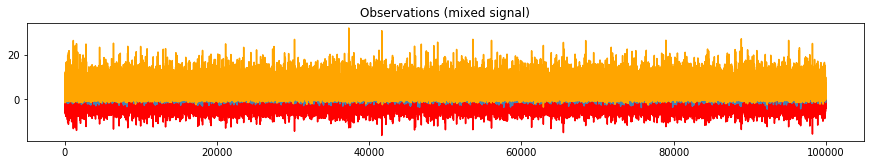

In [173]:
fig, ax = plt.subplots(1,figsize=(15,10))

models = [x]#, S, S_, H]
names = ['Observations (mixed signal)']
         #'True Sources',
         #'ICA recovered signals',
         #'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model, colors):
        plt.plot(sig, color=color)

#plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

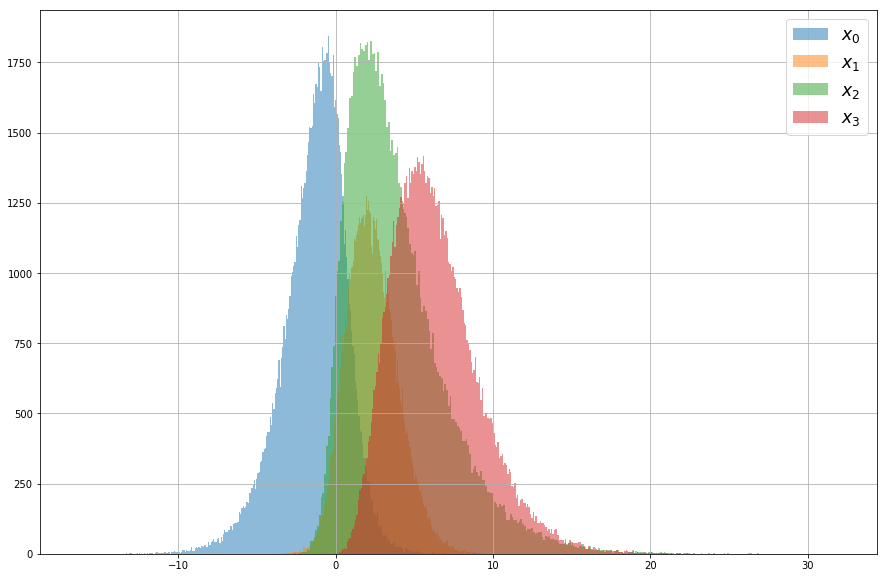

In [174]:
fig, ax = plt.subplots(1,figsize=(15,10))

for i in range(x.shape[0]):
    plt.hist(x[i,:],bins='sqrt',alpha=.5,label=r'$x_%.f$'%(i))

plt.legend(fontsize = 'xx-large')
plt.grid()
plt.show()

In [179]:
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
y = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)

number of interations: 4
Time to converges the FastICA: 0.210 seconds


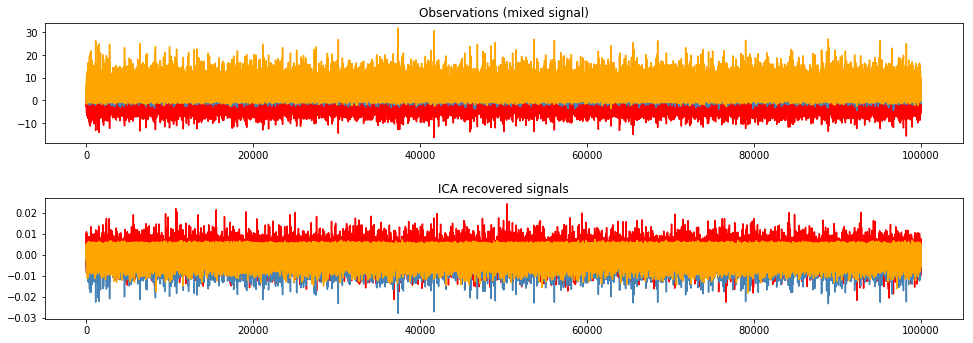

In [176]:
fig, ax = plt.subplots(1,figsize=(15,10))

models = [x,y]#, S, S_, H]
names = ['Observations (mixed signal)',
         'ICA recovered signals']
         #'True Sources',
         #
         #'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

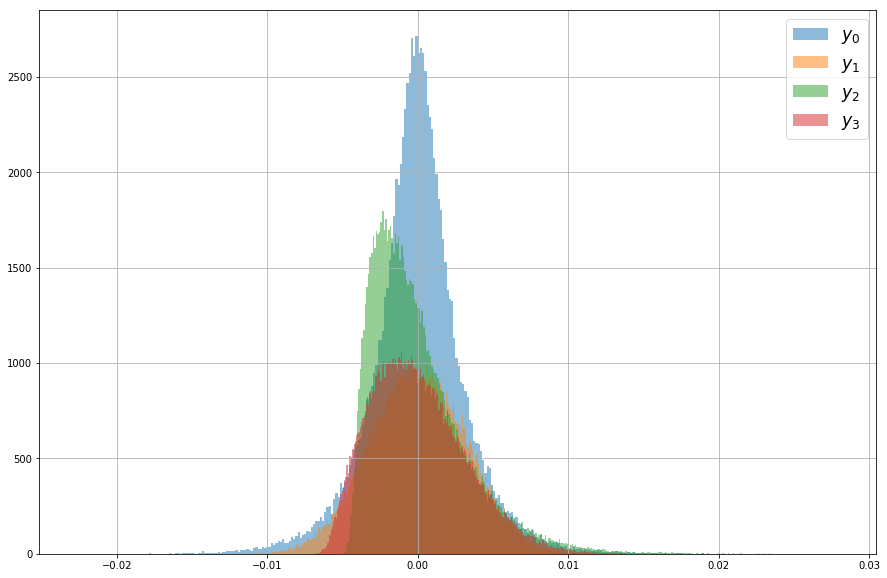

In [180]:
fig, ax = plt.subplots(1,figsize=(15,10))

for i in range(y.shape[0]):
    plt.hist(y[i,:],bins='sqrt',alpha=.5,label=r'$y_%.f$'%(i))


plt.legend(fontsize = 'xx-large')
plt.grid()
plt.show()

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


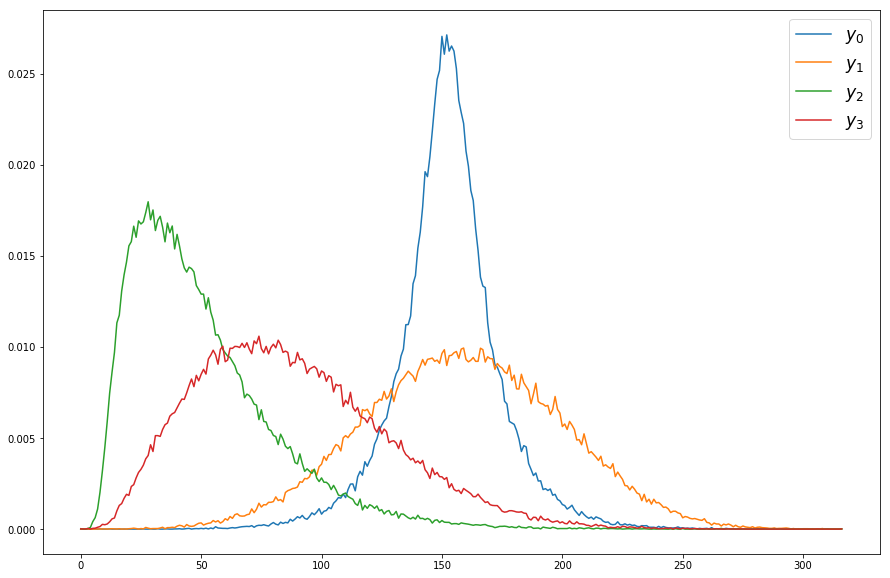

In [181]:
list_pdf = []
for j in range(y.shape[0]):
    list_pdf.append(StatisticalAnalysis.EstPDF(y[j,:],bins='sqrt',mode='hist'))

fig, ax = plt.subplots(1,figsize=(15,10))

for k in range(len(list_pdf)):
    plt.plot(list_pdf[k][0],label=r'$y_%.f$'%(k))
    
plt.legend(fontsize = 'xx-large')
plt.show()

In [110]:
for i in range(y.shape[0]):
    print 'mean and variance', np.mean(y[i,:]),np.var(y[i,:])

mean and variance 9.43689570931e-18 0.01
mean and variance -2.56739074445e-17 0.01
mean and variance 4.53803661316e-17 0.01
mean and variance -1.70002900646e-17 0.01


In [116]:
i_stats = y.shape[1]
loc, scale = 0.,1.
laplacian = np.reshape(np.random.laplace(np.mean(y[1,:]),np.std(y[1,:]), i_stats),[1,i_stats])
uniform = np.reshape(np.random.uniform(-2*np.std(y[2,:]),2*np.std(y[2,:]),i_stats),[1,i_stats])
gaus = np.reshape(np.random.normal(np.mean(y[0,:]),np.std(y[0,:]),i_stats),[1,i_stats])
#rayleigh = np.reshape(np.random.rayleigh(np.std(y[3,:]), i_stats),[1,i_stats])
chi = np.reshape(np.random.chisquare(4, i_stats),[1,i_stats])

s = np.zeros([y.shape[0],i_stats])
s[2,:] = uniform
s[0,:] = gaus
s[1,:] = laplacian
s[3,:] = chi
#s[3,:] = rayleigh

In [19]:
def CreateKLsMatrix(components,sources):
    KL_ida = np.zeros([components.shape[0],components.shape[0]])
    KL_volta = np.zeros([components.shape[0],components.shape[0]])
    for j in range(components.shape[0]):
        for i in range(components.shape[0]):
            KL_ida[i][j]= StatisticalAnalysis.KLDiv(components[i,:],sources[j,:],bins='sqrt', mode='hist', kernel='epanechnikov', kernel_bw=0.1)[0]
            KL_volta[i][j]= StatisticalAnalysis.KLDiv(sources[i,:],components[j,:],bins='sqrt', mode='hist', kernel='epanechnikov', kernel_bw=0.1)[0]

    return [KL_ida,KL_volta]

In [117]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(y,s)

print KL_div

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: His

In [26]:
KL_values_ida = np.zeros([y.shape[0],y.shape[0]])
KL_values_volta = np.zeros([y.shape[0],y.shape[0]])
for j in range(y.shape[0]):
    for i in range(y.shape[0]):
        KL_values_ida[i][j]= StatisticalAnalysis.KLDiv(y[i,:],s[j,:],bins='sqrt', mode='hist', kernel='epanechnikov', kernel_bw=0.1)[0]
        KL_values_volta[i][j]= StatisticalAnalysis.KLDiv(s[i,:],y[j,:],bins='sqrt', mode='hist', kernel='epanechnikov', kernel_bw=0.1)[0]

KL_values_ida,KL_values_volta

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


(array([[ 0.19956545,  0.30548426,  0.34302768],
        [ 0.27597502,  0.07366368,  0.59308916],
        [ 0.31280479,  0.42476951,  0.17537603]]),
 array([[ 0.28662925,  0.42013033,  0.2378844 ],
        [ 0.28326968,  0.11210226,  0.44640326],
        [ 0.5035536 ,  0.7398083 ,  0.1529202 ]]))

In [21]:
#Calculate the Simetric Kullback-Leibler Divergence
def SKLDiv(A,B):
    SKLDiv = np.mean( np.array([ A, B ]), axis=0 )
    return SKLDiv
#np.mean( np.array([ KL_values_ida, KL_values_volta ]), axis=0 )

In [118]:
StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])


array([[ 0.24590059,  0.21404882,  0.31724739,  0.36928978],
       [ 0.18135603,  0.49732323,  0.39383349,  0.63171354],
       [ 0.3724072 ,  0.55393115,  0.07898646,  0.32815527],
       [ 0.44906159,  0.83220409,  0.27426907,  0.64101128]])

In [23]:
def JSDiv(A,B):
    JSDiv = np.zeros([A.shape[0],A.shape[0]])
    for j in range(A.shape[0]):
        for i in range(A.shape[0]):
            M_ij = 0.5*(A[i,:]+B[j,:])
            JSDiv[i][j]=0.5*(StatisticalAnalysis.KLDiv(A[i,:],M_ij,bins='sqrt', mode='hist', kernel='epanechnikov', kernel_bw=0.1)[0] + StatisticalAnalysis.KLDiv(B[j,:],M_ij,bins='sqrt', mode='hist', kernel='epanechnikov', kernel_bw=0.1)[0])
            
    return JSDiv

In [119]:
StatisticalAnalysis.JSDiv(y,s)

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: His

array([[ 0.15480418,  0.08115903,  0.28059416,  0.28972863],
       [ 0.21935808,  0.26701723,  0.3905117 ,  0.53311908],
       [ 0.15653594,  0.25693825,  0.23706011,  0.21163   ],
       [ 0.19310161,  0.2687447 ,  0.21358453,  0.27284579]])

In [115]:
# Calculate the kurtosis
kurtosis = []
for i in range(y.shape[0]):
    kurtosis.append(stats.kstat(y[i,:],4))
print kurtosis

[7.4747538432077144e-05, 0.00038762786481928707, -0.00013511185106903368, 2.4721024205113326e-05]


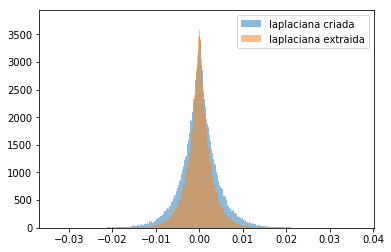

In [44]:
plt.hist(s[0,:],bins='sqrt',alpha=.5,label='laplaciana criada')
plt.hist(y[0,:],bins='sqrt',alpha=.5,label='laplaciana extraida')
plt.legend()
plt.show()

In [80]:
def PDFList(data,bins='sqrt',mode='hist', kernel='epanechnikov', kernel_bw=0.01):
    PDFList = []
    for i in range(data.shape[0]):
        PDFList.append(StatisticalAnalysis.EstPDF(data[j,:],bins=bins,mode=mode,kernel=kernel,kernel_bw=kernel_bw))
    return PDFList
    

In [83]:
PDFList(y,bins='sqrt',mode='hist',kernel='epanechnikov',kernel_bw=0.01)

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


[[array([ 0.03,  0.03,  0.07,  0.16,  0.19,  0.18,  0.19,  0.09,  0.04,  0.02]),
  array([-0.2063205 , -0.15569021, -0.10505992, -0.05442962, -0.00379933,
          0.04683097,  0.09746126,  0.14809155,  0.19872185,  0.24935214])],
 [array([ 0.03,  0.03,  0.07,  0.16,  0.19,  0.18,  0.19,  0.09,  0.04,  0.02]),
  array([-0.2063205 , -0.15569021, -0.10505992, -0.05442962, -0.00379933,
          0.04683097,  0.09746126,  0.14809155,  0.19872185,  0.24935214])],
 [array([ 0.03,  0.03,  0.07,  0.16,  0.19,  0.18,  0.19,  0.09,  0.04,  0.02]),
  array([-0.2063205 , -0.15569021, -0.10505992, -0.05442962, -0.00379933,
          0.04683097,  0.09746126,  0.14809155,  0.19872185,  0.24935214])]]

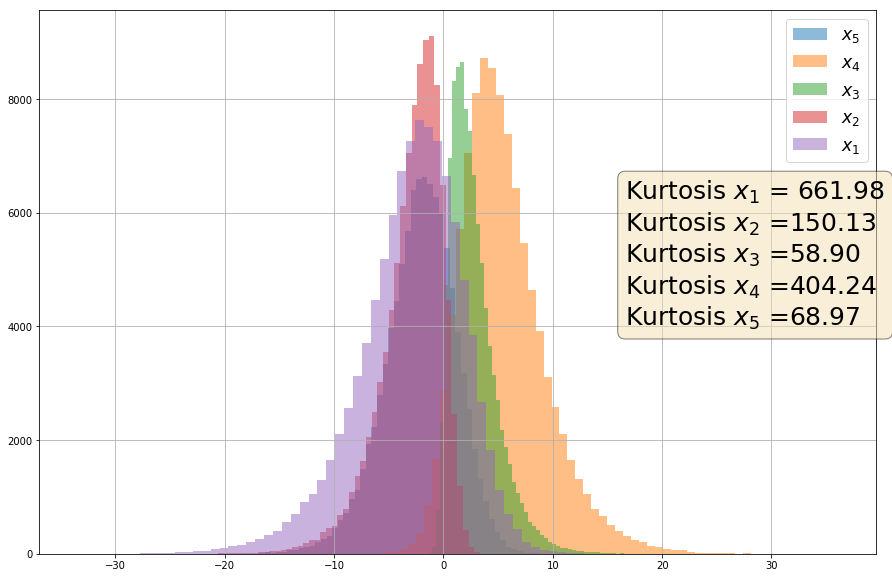

In [86]:
fig, ax = plt.subplots(1,figsize=(15,10))

k1 = stats.kstat(x[0,:],4)
k2 = stats.kstat(x[1,:],4)
k3 = stats.kstat(x[2,:],4)
k4 = stats.kstat(x[3,:],4)
k5 = stats.kstat(x[4,:],4)
textstr = 'Kurtosis $x_1$ = %.2f\nKurtosis $x_2$ =%.2f\nKurtosis $x_3$ =%.2f\nKurtosis $x_4$ =%.2f\nKurtosis $x_5$ =%.2f'%(k1,k2,k3,k4,k5)


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.7, 0.69, textstr, transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

plt.hist(x[4,:],bins=60,alpha=.5,label=r'$x_5$')
plt.hist(x[3,:],bins=60,alpha=.5,label=r'$x_4$')
plt.hist(x[2,:],bins=60,alpha=.5,label=r'$x_3$')
plt.hist(x[1,:],bins=60,alpha=.5,label=r'$x_2$')
plt.hist(x[0,:],bins=60,alpha=.5,label=r'$x_1$')

plt.legend(fontsize = 'xx-large')
plt.grid()
plt.show()

In [100]:
ica = FastICA(n_components=x.shape[0],algorithm='parallel',
              whiten=False,fun='cube')
y = ica.fit_transform(x.T)
y = y.T

In [83]:
y.shape

(5, 100000)

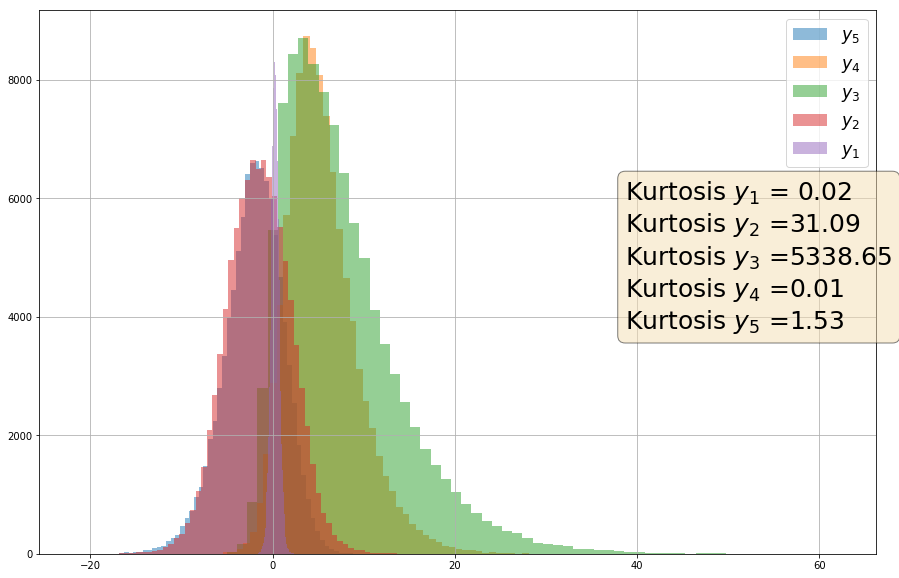

In [101]:
fig, ax = plt.subplots(1,figsize=(15,10))

k1 = stats.kstat(y[0,:],4)
k2 = stats.kstat(y[1,:],4)
k3 = stats.kstat(y[2,:],4)
k4 = stats.kstat(y[3,:],4)
k5 = stats.kstat(y[4,:],4)
textstr = 'Kurtosis $y_1$ = %.2f\nKurtosis $y_2$ =%.2f\nKurtosis $y_3$ =%.2f\nKurtosis $y_4$ =%.2f\nKurtosis $y_5$ =%.2f'%(k1,k2,k3,k4,k5)



props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.7, 0.69, textstr, transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

plt.hist(x[4,:],bins=60,alpha=.5,label=r'$y_5$')
plt.hist(x[3,:],bins=60,alpha=.5,label=r'$y_4$')
plt.hist(y[2,:],bins=60,alpha=.5,label=r'$y_3$')
plt.hist(y[1,:],bins=60,alpha=.5,label=r'$y_2$')
plt.hist(y[0,:],bins=60,alpha=.5,label=r'$y_1$')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.show()

In [105]:
l = []
for i in range(3):
    a = i
    l.append(a)
l

[0, 1, 2]